# **Projek Akhir Komstat II**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import AUC

In [4]:
# Memuat dataset pelatihan dan pengujian
df_train = pd.read_csv('/kaggle/input/d/nasywaauliaputri/health-insurance-cross-sell-prediction/train.csv')
df_test = pd.read_csv('/kaggle/input/d/nasywaauliaputri/health-insurance-cross-sell-prediction/test.csv')

In [4]:
df_train.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [5]:
# Memeriksa kolom
print("Kolom di df_train:", df_train.columns.tolist())
print("Kolom di df_test:", df_test.columns.tolist())

Kolom di df_train: ['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']
Kolom di df_test: ['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


## Preprocessing

In [6]:
# Cek Missing Values
print("Missing values in df_train:\n", df_train.isnull().sum())
print("Missing values in df_test:\n", df_test.isnull().sum())

Missing values in df_train:
 id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64
Missing values in df_test:
 id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64


In [7]:
# Cek Duplikat
print("Duplikat di df_train:", df_train.duplicated().sum())
print("Duplikat di df_test:", df_test.duplicated().sum())

Duplikat di df_train: 0
Duplikat di df_test: 0


## **Visualisasi**

### **Perbandingan Setiap Variabel Kategorik terhadap Variabel `Response`**

<Figure size 1200x600 with 0 Axes>

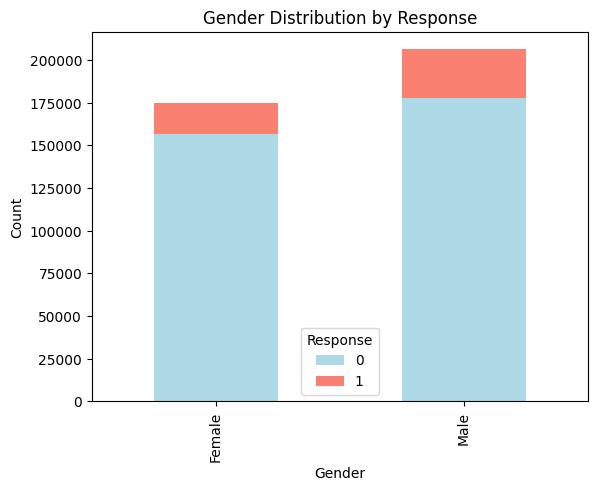

<Figure size 1200x600 with 0 Axes>

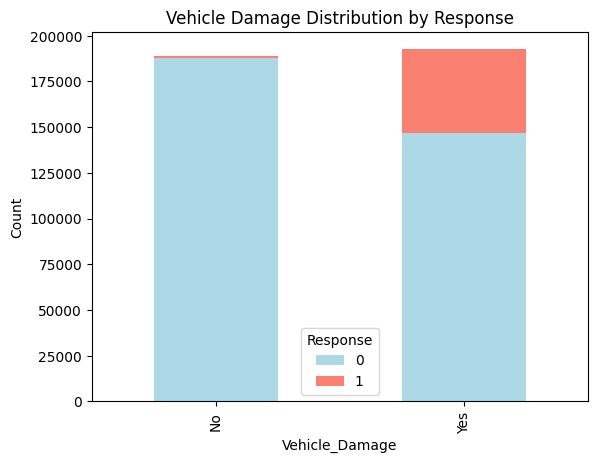

In [9]:
plt.figure(figsize=(12, 6))
gender_response = pd.crosstab(df_train['Gender'], df_train['Response'])
gender_response.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Gender Distribution by Response')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
vehicle_damage_response = pd.crosstab(df_train['Vehicle_Damage'], df_train['Response'])
vehicle_damage_response.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Vehicle Damage Distribution by Response')
plt.ylabel('Count')
plt.show()

### **Korelasi Heatmap Variabel Numerik**

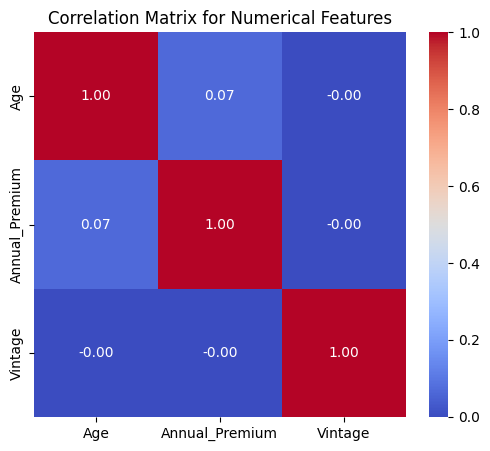

In [10]:
correlation_matrix = df_train[['Age', 'Annual_Premium', 'Vintage']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

## **K-Means dengan PCA**

In [5]:
# Menyimpan ID untuk submisi
train_ids = df_train['id']
test_ids = df_test['id']

In [6]:
# Mengencode variabel kategorikal
categorical_features = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
numerical_features = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

In [7]:
# Menambahkan kolom indikator untuk membedakan train dan test
df_train['is_train'] = 1
df_test['is_train'] = 0

In [8]:
# Menggabungkan data untuk encoding konsisten
combined_data = pd.concat([df_train, df_test], ignore_index=True)
combined_data.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,is_train
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0,1
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0,1
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0,1
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0.0,1
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0.0,1
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1.0,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0.0,1
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0.0,1


In [9]:
# One-hot encoding fitur kategorikal
onehot_encoder = OneHotEncoder(sparse_output=False, dtype=np.int32, handle_unknown='ignore')
encoded_categorical = onehot_encoder.fit_transform(combined_data[categorical_features])
encoded_columns = onehot_encoder.get_feature_names_out(categorical_features)

In [10]:
# Membuat DataFrame untuk fitur yang diencode
encoded_df = pd.DataFrame(encoded_categorical, columns=encoded_columns)

In [11]:
# Menggabungkan fitur numerik, kategorikal yang diencode, dan kolom is_train
combined_data = pd.concat([
    combined_data[numerical_features + ['is_train']].reset_index(drop=True),
    encoded_df
], axis=1)

In [12]:
# Memisahkan kembali data pelatihan dan pengujian
feature_columns = numerical_features + list(encoded_columns)  # Kolom fitur tanpa is_train
train_data = combined_data[combined_data['is_train'] == 1][feature_columns].reset_index(drop=True)
test_data = combined_data[combined_data['is_train'] == 0][feature_columns].reset_index(drop=True)

In [13]:
# Memeriksa jumlah kolom
print("Kolom di train_data:", train_data.columns.tolist())
print("Jumlah kolom di train_data:", len(train_data.columns))

Kolom di train_data: ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Gender_Female', 'Gender_Male', 'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Vehicle_Damage_No', 'Vehicle_Damage_Yes']
Jumlah kolom di train_data: 14


In [14]:
# Menskalakan fitur
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

In [15]:
# Menerapkan PCA
pca = PCA(n_components=0.95)
train_pca = pca.fit_transform(train_scaled)
test_pca = pca.transform(test_scaled)

print(f"Jumlah komponen PCA: {pca.n_components_}")
print(f"Varians yang dijelaskan: {sum(pca.explained_variance_ratio_):.4f}")

Jumlah komponen PCA: 9
Varians yang dijelaskan: 0.9657


In [16]:
# Inverse transform untuk profiling
train_inverse = scaler.inverse_transform(pca.inverse_transform(train_pca))
train_inverse_df = pd.DataFrame(train_inverse, columns=feature_columns)

In [18]:
# Rekonstruksi fitur kategorikal dari kolom one-hot encoded
categorical_reconstructed = {}
for feature in categorical_features:
    feature_cols = [col for col in train_inverse_df.columns if col.startswith(feature)]
    # Mendapatkan kategori dengan nilai maksimum (argmax) untuk setiap baris
    categorical_reconstructed[feature] = onehot_encoder.categories_[categorical_features.index(feature)][
        np.argmax(train_inverse_df[feature_cols].values, axis=1)
    ]

In [19]:
# Membuat DataFrame untuk fitur kategorikal yang direkonstruksi
categorical_reconstructed_df = pd.DataFrame(categorical_reconstructed)

In [20]:
# Menggabungkan fitur numerik dan kategorikal yang direkonstruksi
train_inverse_df = pd.concat([
    train_inverse_df[numerical_features].reset_index(drop=True),
    categorical_reconstructed_df.reset_index(drop=True)
], axis=1)

In [21]:
# Menentukan jumlah cluster optimal dengan Elbow Method dan Silhouette Score
inertia = []
silhouette_scores = []
k_range = range(2, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(train_pca)
    
    inertia.append(kmeans.inertia_)
    if k > 1:
        score = silhouette_score(train_pca, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(0)
    print(f"K={k}, Inertia={kmeans.inertia_:.4f}, Silhouette Score={silhouette_scores[-1]:.4f}")

K=2, Inertia=3899916.1564, Silhouette Score=0.2555
K=3, Inertia=3381219.0492, Silhouette Score=0.2432
K=4, Inertia=2967389.7874, Silhouette Score=0.2716
K=5, Inertia=2656918.1121, Silhouette Score=0.2854
K=6, Inertia=2226958.1460, Silhouette Score=0.2968
K=7, Inertia=1996772.5445, Silhouette Score=0.2934


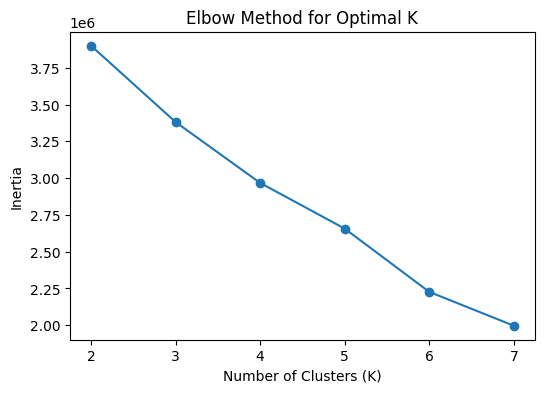

In [22]:
# Visualisasi Elbow Method
plt.figure(figsize=(6, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

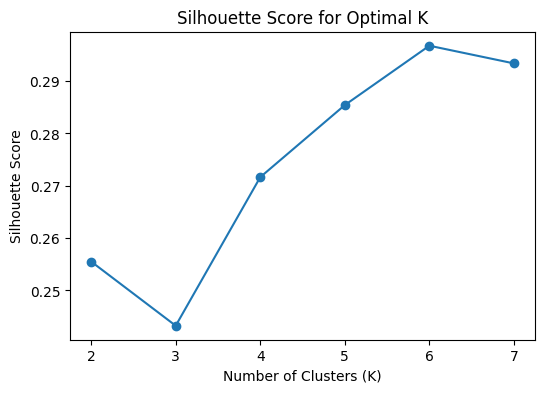

In [23]:
# Visualisasi Silhouette Score
plt.figure(figsize=(6, 4))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

In [24]:
# Memilih jumlah cluster optimal
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
train_clusters = kmeans.fit_predict(train_pca)
test_data_array = np.array(test_data)
if test_data_array.shape[0] > 0:
    test_clusters = kmeans.predict(test_pca)
else:
    print("Warning: test_data is empty. Cannot generate predictions for test set.")
    test_clusters = np.zeros(len(test_ids), dtype=np.int32)  # Placeholder jika test_data kosong

In [25]:
# Menambahkan cluster ke data inverse untuk profiling
train_inverse_df['Cluster'] = train_clusters

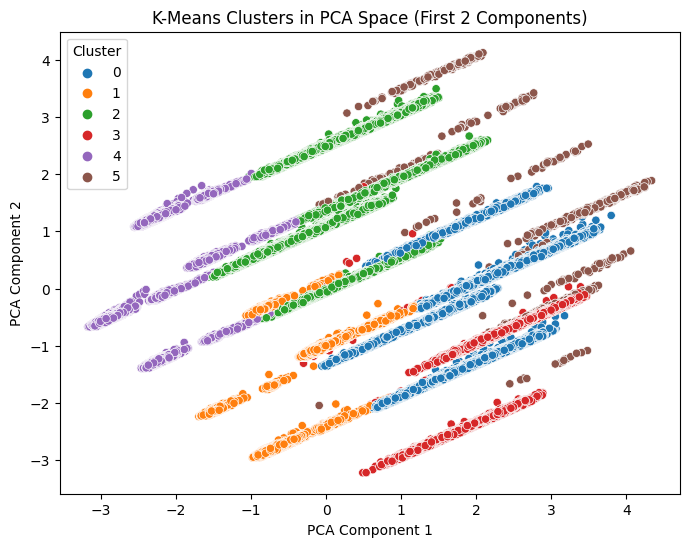

In [26]:
# Visualisasi cluster dalam ruang PCA (2 komponen pertama)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_pca[:, 0], y=train_pca[:, 1], hue=train_clusters, palette='tab10')
plt.title('K-Means Clusters in PCA Space (First 2 Components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

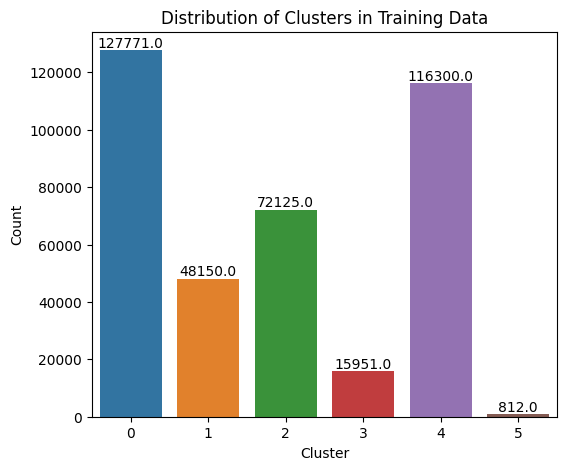

In [27]:
# Visualisasi distribusi cluster
plt.figure(figsize=(6, 5))
ax = sns.countplot(x=train_clusters, palette='tab10')

# Menambahkan label frekuensi di atas setiap batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Clusters in Training Data')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [28]:
# Profiling cluster
cluster_summary = train_inverse_df.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'Driving_License': ['mean', 'count'],
    'Region_Code': ['mean', 'std'],
    'Previously_Insured': ['mean', 'count'],
    'Annual_Premium': ['mean', 'std'],
    'Policy_Sales_Channel': ['mean', 'std'],
    'Vintage': ['mean', 'std'],
    'Gender': lambda x: x.mode()[0],
    'Vehicle_Age': lambda x: x.mode()[0],
    'Vehicle_Damage': lambda x: x.mode()[0]
})
print("\nProfil Cluster:")
print(cluster_summary)


Profil Cluster:
               Age           Driving_License         Region_Code             \
              mean       std            mean   count        mean        std   
Cluster                                                                       
0        48.715611  4.493362        1.000071  127771   26.894017  12.234540   
1        21.512682  1.599068        0.999503   48150   26.234088  14.131551   
2        51.885620  4.834730        1.000269   72125   26.817377  13.063492   
3        58.735794  4.036061        1.000584   15951   27.307169  10.529538   
4        24.079635  1.191810        0.999877  116300   25.503954  14.250558   
5        68.659469  4.506643        0.000496     812   26.693667  12.089112   

        Previously_Insured         Annual_Premium                \
                      mean   count           mean           std   
Cluster                                                           
0                 0.008982  127771   30622.772533  18782.848240   
1  

In [29]:
# Menyimpan hasil cluster untuk data pengujian
submission = pd.DataFrame({
    'id': test_ids,
    'Cluster': test_clusters
})
submission.to_csv('kmeans_pca_submission.csv', index=False)
print("\nCluster predictions saved to 'kmeans_pca_submission.csv'")


Cluster predictions saved to 'kmeans_pca_submission.csv'


## **ANN**

In [6]:
# Pemisahan Fitur (X) dan Target (y) untuk Data Pelatihan
X = df_train.drop(['id', 'Response'], axis=1)
y = df_train['Response']

In [7]:
# Menyimpan ID dari data pengujian untuk file submission di kemudian hari
test_ids = df_test['id']
# Menghapus kolom 'id' dari data pengujian karena tidak digunakan untuk pelatihan model
X_test = df_test.drop('id', axis=1)

In [8]:
# Identifikasi Fitur Numerik dan Kategorikal
numerical_features = ['Age', 'Annual_Premium', 'Vintage']

categorical_features = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured',
                        'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']

In [9]:
# Membuat Pipeline Preprocessing Data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
                ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [10]:
# Memisahkan Data Pelatihan menjadi Set Pelatihan dan Validasi
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Melakukan Preprocessing pada Data
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

In [13]:
# Mendefinisikan Arsitektur Model ANN (Jaringan Saraf Tiruan)
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [14]:
# Mengkompilasi Model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', AUC(name='auc')]
)

In [15]:
# Menampilkan ringkasan arsitektur model (jumlah lapisan, neuron, parameter)
print("\nRingkasan Model:")
model.summary()


Ringkasan Model:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │          28,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,737 (143.50 KB)

 Trainable params: 36,737 (143.50 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Melatih model menggunakan data pelatihan yang telah diproses.
history = model.fit(
    X_train_processed, y_train,
    epochs=50,          # Jumlah iterasi penuh melalui seluruh dataset pelatihan.
    batch_size=1024,    # Jumlah sampel yang akan diproses sebelum bobot model diperbarui.
    validation_data=(X_val_processed, y_val), # Data yang digunakan untuk mengevaluasi loss dan metrik
    verbose=1           # Menampilkan progres pelatihan.
)

Epoch 1/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8785 - auc: 0.8641 - loss: 0.2608 - val_accuracy: 0.8769 - val_auc: 0.8574 - val_loss: 0.2649
Epoch 2/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8786 - auc: 0.8646 - loss: 0.2611 - val_accuracy: 0.8770 - val_auc: 0.8572 - val_loss: 0.2649
Epoch 3/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8786 - auc: 0.8642 - loss: 0.2614 - val_accuracy: 0.8766 - val_auc: 0.8572 - val_loss: 0.2652
Epoch 4/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8786 - auc: 0.8639 - loss: 0.2608 - val_accuracy: 0.8772 - val_auc: 0.8570 - val_loss: 0.2651
Epoch 5/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8796 - auc: 0.8639 - loss: 0.2600 - val_accuracy: 0.8767 - val_auc: 0.8570 - val_loss: 0.2652
Epoch 6/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8778 - auc: 0.8660 - loss: 0.2607 - val_accuracy: 0.8766 - val_auc: 0.8572 - val_loss: 0.2651
Epoch 7/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 

In [19]:
# Mengevaluasi kinerja model pada set validasi yang tidak terlihat selama pelatihan.
loss, accuracy, auc_score = model.evaluate(X_val_processed, y_val, verbose=0)
print(f'\nEvaluasi pada Data Validasi:')
print(f'Loss Validasi: {loss:.4f}')
print(f'Akurasi Validasi: {accuracy:.4f}')
print(f'AUC Validasi: {auc_score:.4f}')


Evaluasi pada Data Validasi:
Loss Validasi: 0.2685
Akurasi Validasi: 0.8760
AUC Validasi: 0.8543


In [20]:
# Membuat Prediksi pada Data Pengujian
predictions_proba = model.predict(X_test_processed)
predictions_binary = (predictions_proba >= 0.5).astype(int)

3970/3970 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step


In [21]:
# Menyimpan DataFrame submission ke file CSV.
submission_df = pd.DataFrame({'id': test_ids, 'Response': predictions_binary.flatten()})
submission_df.to_csv('submission.csv', index=False)
print("\nPrediksi telah dibuat dan disimpan ke 'submission.csv'")
print("Contoh 5 baris pertama dari file submission:")
print(submission_df.head())


Prediksi telah dibuat dan disimpan ke 'submission.csv'
Contoh 5 baris pertama dari file submission:
       id  Response
0  381110         0
1  381111         0
2  381112         0
3  381113         0
4  381114         0
